<ipython-input-2-d2aea723f30d>:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  random_forest_model.fit(X_train, y_train)


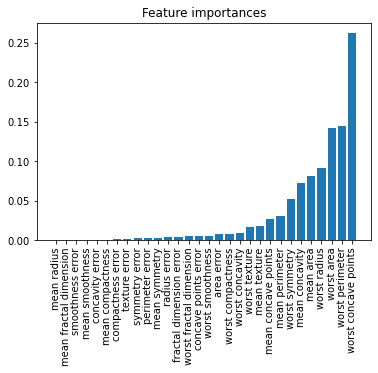

In [2]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

cancer_data = load_breast_cancer()
X = pd.DataFrame(cancer_data.data, columns=cancer_data.feature_names)
y = pd.DataFrame(cancer_data.target, columns=['class'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

random_forest_model = RandomForestClassifier(n_estimators=10, max_depth=4)
random_forest_model.fit(X_train, y_train)

predictions = random_forest_model.predict(X_test)
score = random_forest_model.score(X_test, y_test) # 학습 모델의 성능 평가

importances = random_forest_model.feature_importances_ #속성중요도
#속성중요도 시각화
indices_sorted = np.argsort(importances)
plt.figure()
plt.title("Feature importances")
plt.bar(range(len(importances)), importances[indices_sorted])
plt.xticks(range(len(importances)), X.columns[indices_sorted], rotation=90)
plt.show()